In [126]:
### 决策边界
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,X,y,axes=[-1.5,2.5,-1,1.5],alpha=0.5,contour =True):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,cmap = custom_cmap,alpha=0.3)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap = custom_cmap2,alpha=0.8)
    plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha = 0.6)
    plt.plot(X[:,0][y==0],X[:,1][y==1],'bs',alpha = 0.6)
    plt.axis(axes)
    plt.xlabel('x1')
    plt.xlabel('x2')

### 集成基本思想：
训练时用多种分类器一起完成同一份任务

测试时对待测试样本分别通过不同的分类器，汇总最后的结果


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [100]:
pointnum = 500
X,y = make_moons(n_samples=pointnum,noise=0.3,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

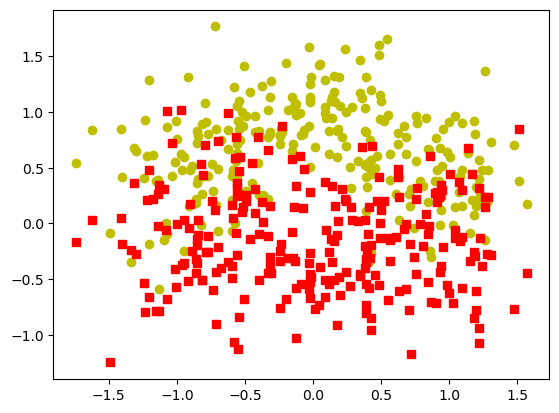

In [102]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo')
plt.plot(X[:,0][y==0],X[:,1][y==1],'rs')

### 投票策略：软投票与硬投票
- 硬投票：直接用类别值，少数服从多数
- 软投票：各自分类器的概率值进行加权平均

### 硬投票

In [103]:

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(random_state=42)


vote_clf = VotingClassifier(estimators=[('lr',log_clf),
                                        ('rf',rnd_clf),
                                        ('svc',svc_clf)
                                        ],voting='hard')

In [104]:
vote_clf.fit(X_train ,y_train);

In [105]:
# 创建一个空列表，用于存储每个模型的预测结果
y_pred_list = []
for clf in (log_clf,rnd_clf,svc_clf,vote_clf):
    clf.fit(X_train ,y_train)
    y_pred = clf.predict(X_test)
    y_pred_list.append(y_pred)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

# 将 y_pred_list 转换为 NumPy 数组
y_pred_array = np.array(y_pred_list)
y_pred_transposed = y_pred_array.T
print('y_pred_transposed.shape=',y_pred_transposed.shape)

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912
y_pred_transposed.shape= (125, 4)


### 软投票

In [106]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(probability=True,random_state=42)


vote_clf = VotingClassifier(estimators=[('lr',log_clf),
                                        ('rf',rnd_clf),
                                        ('svc',svc_clf)
                                        ],voting='soft')

In [107]:
vote_clf.fit(X_train ,y_train);

In [108]:
# 创建一个空列表，用于存储每个模型的预测结果
y_pred_list = []
for clf in (log_clf,rnd_clf,svc_clf,vote_clf):
    clf.fit(X_train ,y_train)
    y_pred = clf.predict(X_test)
    y_pred_list.append(y_pred)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

# 将 y_pred_list 转换为 NumPy 数组
y_pred_array = np.array(y_pred_list)
# 使用 NumPy 的转置操作将数组进行转置
y_pred_transposed = y_pred_array.T
print('y_pred_transposed.shape=',y_pred_transposed.shape)

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92
y_pred_transposed.shape= (125, 4)


Text(0.5, 1.0, 'vote_clf')

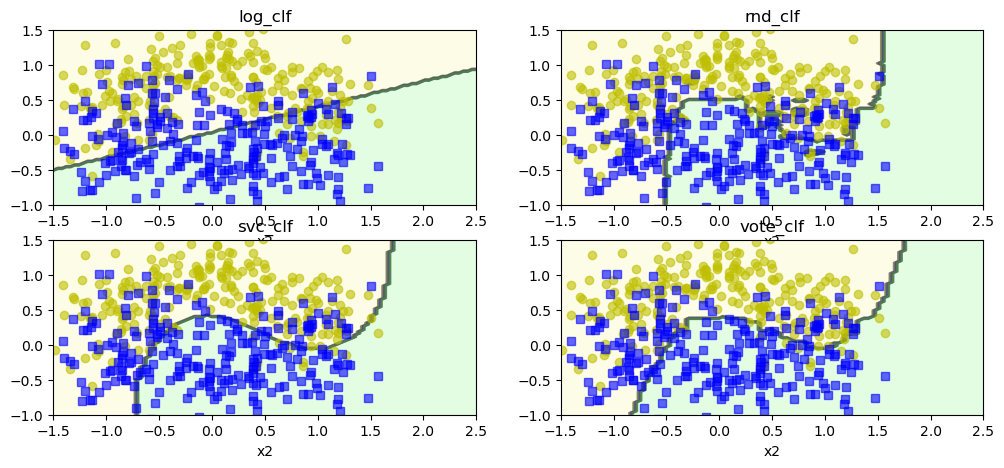

In [109]:
plt.figure(figsize = (12,5))
plt.subplot(221)
plot_decision_boundary(log_clf,X,y)
plt.title('log_clf')
plt.subplot(222)
plot_decision_boundary(rnd_clf,X,y)
plt.title('rnd_clf')
plt.subplot(223)
plot_decision_boundary(svc_clf,X,y)
plt.title('svc_clf')
plt.subplot(224)
plot_decision_boundary(vote_clf,X,y)
plt.title('vote_clf')

### Bagging策略
- 首先对训练数据集进行多次采样，保证每次得到的采样数据都是不同的
- 分别训练多个模型，例如树模型
- 预测时需得到所有模型结果再进行集成

In [110]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                  n_estimators=1000,
                  max_samples=0.2,
                  bootstrap= True,
                  n_jobs=-1,
                  random_state=42
)
bag_clf.fit(X_train ,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.2, n_estimators=1000, n_jobs=-1,
                  random_state=42)

In [111]:
y_pred = bag_clf.predict(X_test)
print('bag_clf',accuracy_score(y_test,y_pred))

bag_clf 0.928


In [112]:
df_clf = DecisionTreeClassifier(random_state=42)
df_clf.fit(X_train ,y_train)
y_pred = df_clf.predict(X_test)
print('df_clf',accuracy_score(y_test,y_pred))

df_clf 0.856


Text(0.5, 1.0, 'Decision Tree With Bagging')

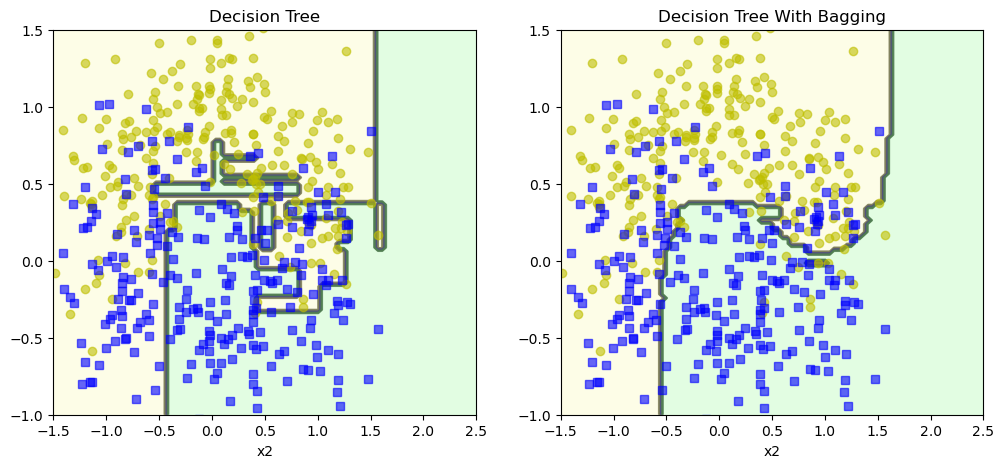

In [114]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plot_decision_boundary(df_clf,X,y)
plt.title('Decision Tree')
plt.subplot(122)
plot_decision_boundary(bag_clf,X,y)
plt.title('Decision Tree With Bagging')

### OOB策略
- Out Of Bag

In [115]:
bag_oob_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                  n_estimators=1000,
                  max_samples=0.2,
                  bootstrap= True,
                  n_jobs=-1,
                  oob_score=True,
                  random_state=42
)
bag_oob_clf.fit(X_train ,y_train)
bag_oob_clf.oob_score_
bag_oob_clf.oob_decision_function_

array([[0.36855037, 0.63144963],
       [0.37761378, 0.62238622],
       [0.99877601, 0.00122399],
       [0.0120919 , 0.9879081 ],
       [0.03427173, 0.96572827],
       [0.09254808, 0.90745192],
       [0.38480697, 0.61519303],
       [0.09259259, 0.90740741],
       [0.92804878, 0.07195122],
       [0.79075426, 0.20924574],
       [0.51017964, 0.48982036],
       [0.06117647, 0.93882353],
       [0.72078721, 0.27921279],
       [0.84587814, 0.15412186],
       [0.92517815, 0.07482185],
       [0.07673569, 0.92326431],
       [0.06545455, 0.93454545],
       [0.91428571, 0.08571429],
       [0.61650485, 0.38349515],
       [0.93053892, 0.06946108],
       [0.06608479, 0.93391521],
       [0.19899244, 0.80100756],
       [0.88835534, 0.11164466],
       [0.9842615 , 0.0157385 ],
       [0.94840295, 0.05159705],
       [0.00487211, 0.99512789],
       [0.92173913, 0.07826087],
       [0.99756987, 0.00243013],
       [0.05788177, 0.94211823],
       [0.73671498, 0.26328502],
       [0.

In [116]:
y_pred = bag_oob_clf.predict(X_test)
print('bag_clf',accuracy_score(y_test,y_pred))

bag_clf 0.928


### 随机森林

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

### 特征重要性：
sklearn中是看每个特征的平均深度

In [118]:
from sklearn.datasets import load_iris
iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rf_clf.feature_importances_):
    print (name,score)

sepal length (cm) 0.10359152107965049
sepal width (cm) 0.02417662611174935
petal length (cm) 0.41725672352623344
petal width (cm) 0.4549751292823668


In [120]:
from scipy.io import loadmat
mat_file_path = 'mnist-original.mat'

# 使用loadmat加载MAT文件
mnist = loadmat(mat_file_path)

In [122]:
rf_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(mnist['data'],mnist['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [123]:
rf_clf.feature_importances_.shape

(784,)

In [124]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=matplotlib.cm.hot)
    plt.axis('off')


[Text(1, 0.0, 'Not important'),
 Text(1, 0.009251567748941333, 'Very important')]

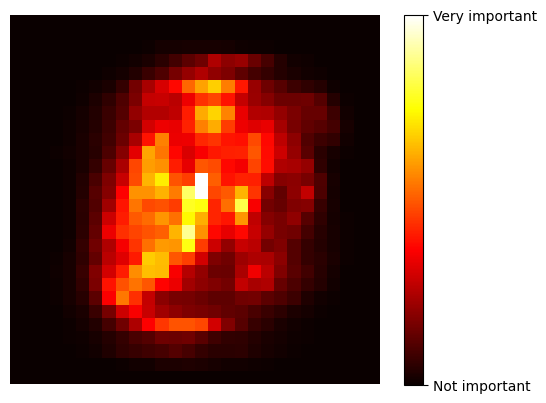

In [125]:
plot_digit(rf_clf.feature_importances_)
char = plt.colorbar(ticks=[rf_clf.feature_importances_.min(),rf_clf.feature_importances_.max()])
char.ax.set_yticklabels(['Not important','Very important'])

### Boosting-提升策略
### AdaBoost
跟上学时的考试一样，这次做错的题，是不是得额外注意，下次的时候就和别错了！

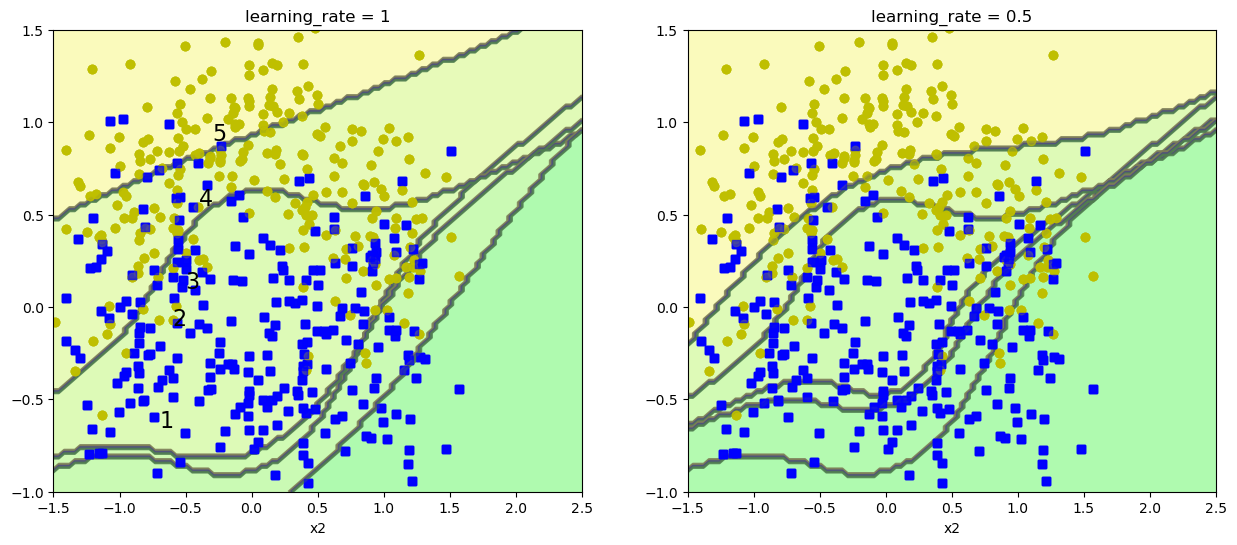

In [159]:
from sklearn.svm import SVC

m = len(X_train)

plt.figure(figsize=(15,6))
for subplot,learning_rate in ((121,1),(122,0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel='rbf',C=0.05,random_state=42)
        svm_clf.fit(X_train,y_train,sample_weight = sample_weights)
        y_pred = svm_clf.predict(X_train)

        sample_weights[y_pred != y_train] *= (1+learning_rate)
        plot_decision_boundary(svm_clf,X,y,alpha=0.1)
        plt.title('learning_rate = {}'.format(learning_rate))

    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=16)
        plt.text(-0.6, -0.10, "2", fontsize=16)
        plt.text(-0.5,  0.10, "3", fontsize=16)
        plt.text(-0.4,  0.55, "4", fontsize=16)
        plt.text(-0.3,  0.90, "5", fontsize=16)
 
plt.show()

### Gradient Boosting

In [154]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(SVC(kernel='rbf',C=0.05,random_state=42),
                #    n_estimators = 200,
                   learning_rate = 0.5,
                   random_state = 42
)

In [155]:
ada_clf.fit(X_train,y_train)
plot_decision_boundary(ada_clf,X,y)

TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

### Gradient Boosting

In [160]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)

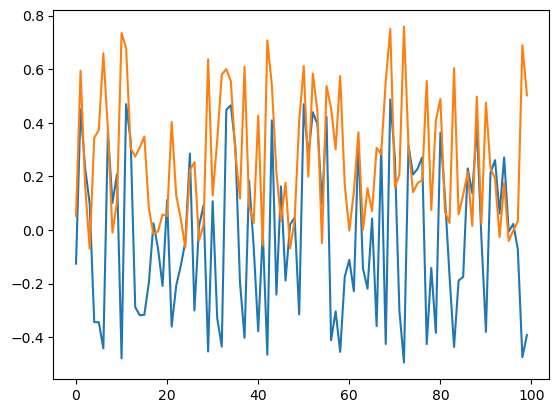

In [170]:
plt.plot(X)
plt.plot(y)

In [195]:
y.shape

(100,)

In [209]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.265'),
 Text(0.25, 0.5, 'X[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.574'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.004\nsamples = 9\nvalue = 0.661'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.005\nsamples = 9\nvalue = 0.488'),
 Text(0.75, 0.5, 'X[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = 0.198'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.016\nsamples = 67\nvalue = 0.124'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.013\nsamples = 15\nvalue = 0.529')]

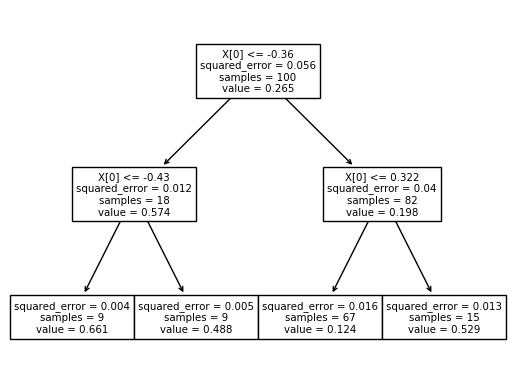

In [215]:
from sklearn import tree
tree.plot_tree(tree_reg1)

In [211]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

In [212]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2)

In [213]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))
y_pred

array([0.75026781])

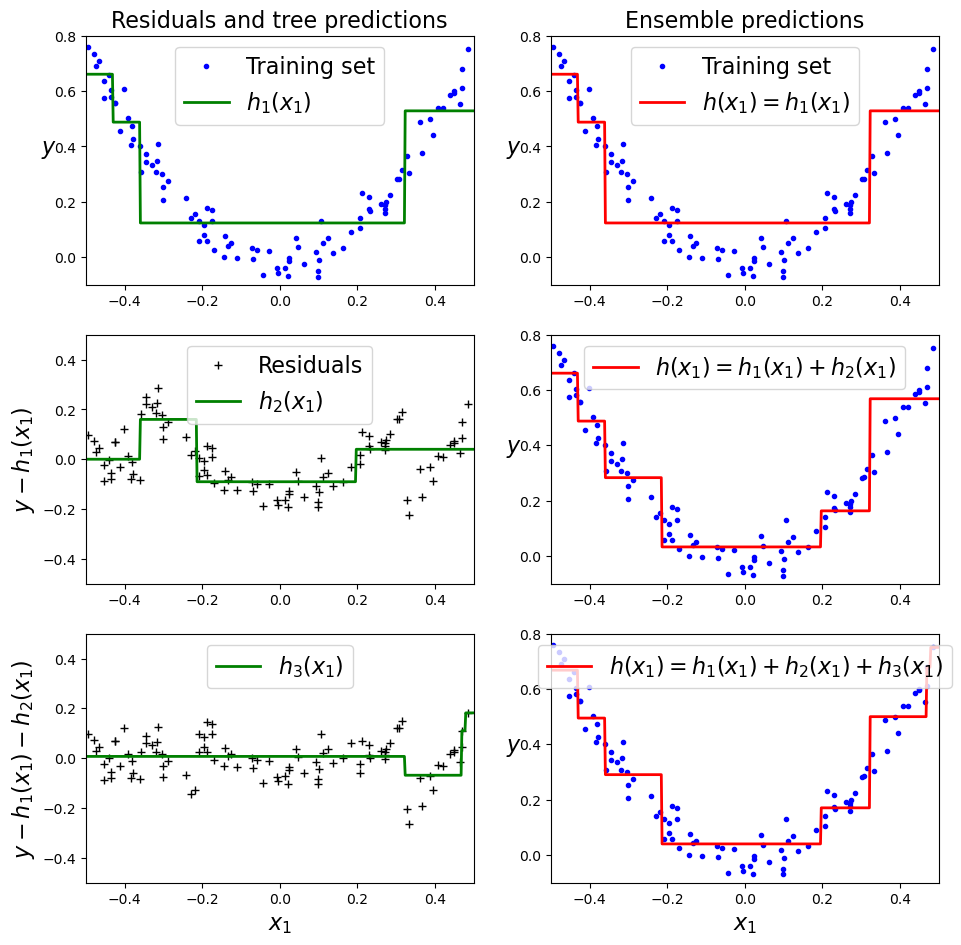

In [214]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [257]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2,
                          n_estimators = 3,
                          learning_rate = 1.0,
                          random_state = 41
)
gbrt.fit(X,y);

In [262]:
gbrt_slow_1 = GradientBoostingRegressor(max_depth = 2,
                          n_estimators = 3,
                          learning_rate = 0.1,
                          random_state = 41
)
gbrt_slow_1.fit(X,y);

In [263]:
gbrt_slow_2 = GradientBoostingRegressor(max_depth = 2,
                          n_estimators = 100,
                          learning_rate = 1.0,
                          random_state = 41
)
gbrt_slow_2.fit(X,y);

Text(0.5, 1.0, 'learning_rate=1.0,n_estimators=100')

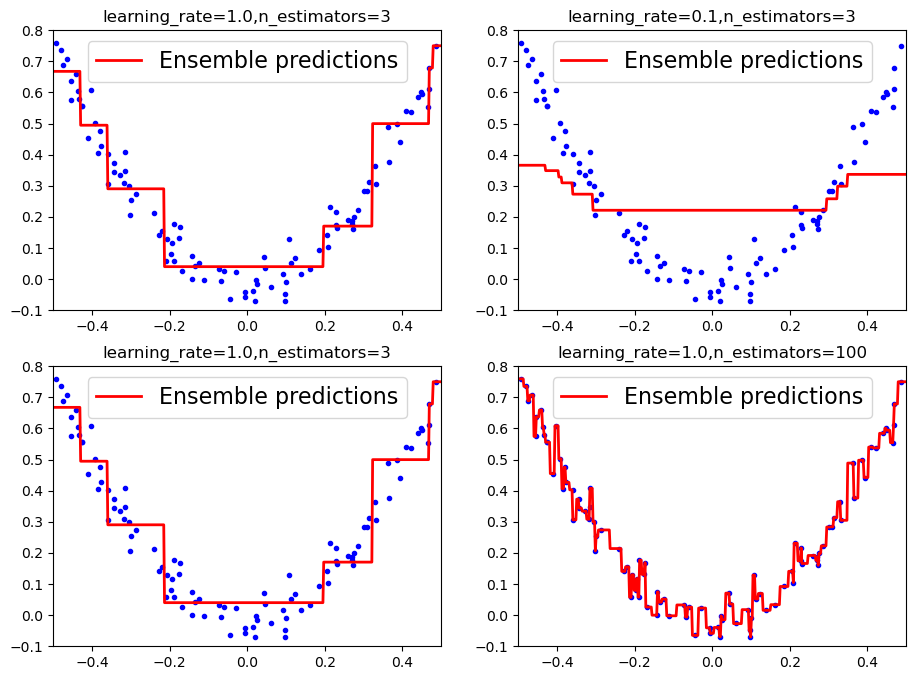

In [264]:
plt.figure(figsize = (11,8))
plt.subplot(221)
plot_predictions([gbrt],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt.learning_rate,gbrt.n_estimators))

plt.subplot(222)
plot_predictions([gbrt_slow_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_1.learning_rate,gbrt_slow_1.n_estimators))


plt.subplot(223)
plot_predictions([gbrt],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt.learning_rate,gbrt.n_estimators))


plt.subplot(224)
plot_predictions([gbrt_slow_2],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_2.learning_rate,gbrt_slow_2.n_estimators))


Text(0.5, 1.0, 'learning_rate=0.1,n_estimators=3')

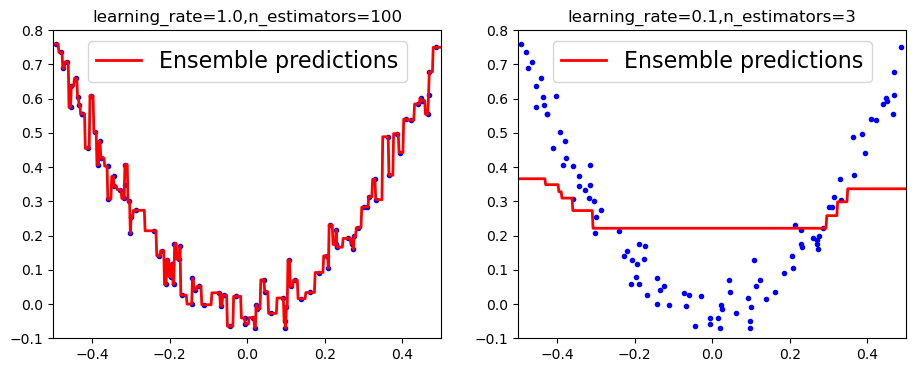

In [312]:
plt.figure(figsize = (11,4))
plt.subplot(121)
plot_predictions([gbrt_slow_2],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_2.learning_rate,gbrt_slow_2.n_estimators))

plt.subplot(122)
plot_predictions([gbrt_slow_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_1.learning_rate,gbrt_slow_1.n_estimators))


### 提前停止策略

In [308]:
from sklearn.metrics import mean_squared_error
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=42)

gbrt = GradientBoostingRegressor(max_depth = 2,
                          n_estimators = 150,
                          random_state = 42
)
gbrt.fit(X_train,y_train);

errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]

bes_n_estimators = np.argmin(errors)



In [309]:
gbrt_best = GradientBoostingRegressor(max_depth = 2,
                          n_estimators = bes_n_estimators,
                          random_state = 42
)
gbrt_best.fit(X_train,y_train);

117


Text(0.5, 1.0, 'Best Model(117 trees)')

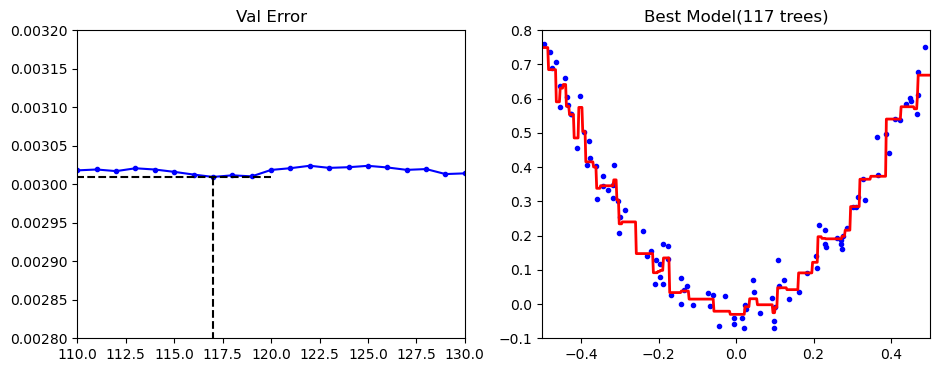

In [317]:
plt.figure(figsize = (11,4))
plt.subplot(121)
min_error = np.min(errors)
print(bes_n_estimators)
plt.plot(errors,'b.-')
plt.plot([bes_n_estimators,bes_n_estimators],[0,min_error],'k--')
plt.plot([0,120],[min_error,min_error],'k--')
plt.axis([110,130,0.0028,0.0032])
plt.title('Val Error')


plt.subplot(122)
plot_predictions([gbrt_best],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title('Best Model(%d trees)'%bes_n_estimators)




### early stoping

In [327]:
gbrt = GradientBoostingRegressor(max_depth = 2,
                             random_state = 42,
                                 warm_start =True
)
error_going_up = 0
min_val_error = float('inf')
# 训练的时候，min_error连续的下降，当不再下降的时候，对error_going_up加1
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val,y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 5:
            break
    print (gbrt.n_estimators,error_going_up)

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 1
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 1
69 0
70 0
71 0
72 0
73 0
74 0
75 1
76 0
77 0
78 0
79 1
80 0
81 0
82 0
83 1
84 2
85 3
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 1
95 2
96 0
97 1
98 2
99 0
100 0
101 1
102 2
103 3
104 4


105


### Stacking（堆叠集成）

In [329]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata('MNIST original')

X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

AttributeError: 'dict' object has no attribute 'data'